### Investigating Non Alcohol Fatty Liver Disease Dataset With Machine Learning Decision Trees

### By Lukas Taylor

My main kaggle notebook for the non alcohol fatty liver disease dataset is here:

In this notebook, we will be delving deep into forest treest to understand both how Nonalcoholic Fatty Liver Disease (NAFLD) is predicted by machine learning, but also how machine learning forests work in general.

Note: Some decision trees will have slightly different values than discussed in the journal as there will be differences when re-running the code.

### 1. Introduction To Decision Trees

Although there are ways to use decision trees for regression (where a numerical value is trying to be predicted), we will focus on decision trees for classification (where a category is trying to be predicted). There are many machine learning tools for classification. We chose to focus on decision trees because they offer a very understandable way to learn how a machine learning tool is making its classifications. Oftentimes, understanding where classifications and regressions are coming from in machine learning tools can feel opaque. Trying to understand hyperplanes can be a difficult task (although from a geometric perspective, hyperplanes are still relevant here). Decision trees, on the other hand, can be broken down into simple terms as long as you understand their basic components.

### There are two main objects in decision trees: leaf nodes and test nodes. As stated in "Learning Decision Tree Classifiers",

"A tree is either a leaf node labeled with a class or a structure consisting of a test node linked to two or more subtrees. A test node computes some outcome based on the attribute values of an instance, where each possible outcome is associ- ated with one of the subtrees. An in- stance is classified by starting at the root node of the tree. If this node is a test, the outcome for the instance is determined and the process continues using the appropriate subtree. When a leaf is eventually encountered, its label gives the predicted class of the instance."

### Let's see these parts in action.

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

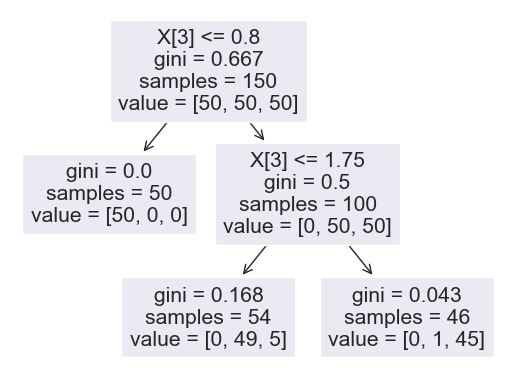

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_leaf_nodes=3)
clf = clf.fit(X, y)
tree.plot_tree(clf)

Here, you have a relatively simple decision tree. You can easily determine what kind of decision tree you are looking at in each box. At each of the test nodes, a mathmatical expression is held (ex: x[3] <= 0.8). At each of the leaf nodes, there are no arrows below them connecting to another tree.

Classifications are made by starting at the root of the tree, where the decision making process starts. If the inequality at this point is true, we move down the left arrow. If the inequality is false, we move down the right arrow. At each time we move down to another tree, we ask ourselves: is this a leaf node or a test node? If it's a test node, we evaluate if the inequality at that test node is true or false, and we respond by either moving down to the left or to the right. If we are at a leaf node, we decide which type of class the piece of data belongs to.

More complex test nodes can do more than simply asking if a inequality holds or not. A test is formed by the machine learning tool by trying to find the test nodes and leaf nodes in such a way that each leaf node, at the end of evaluating the training data, more or less holds data from one class. That way, we can be more confident that other data will be sufficiently seperated by class, by the time they reach the leaf nodes, that a classification can be confidently made. In other words, we want each leaf node to hold the same class of data.

One may ask what the gini value is. At each tree in the decision making process above, we see a gini value. This is done to check how well the splitting of classes is going in the decision making process. If we want to ask ourselves how much information is gained by splitting up data into multiple parts at each tree, we must ask ourselves how random the data is before and after splitting the dada. Here, by randomness, we mean how much of the data is seperated into seperate classes.

So if a tree makes a decision that seperates the data perfectly into two different classes, we call it "pure", and there is no randomness. You might see the term "entropy" being thrown around when people talk about decison trees. In this instance, you can think about the ammount of entropy as the how impure the data is (or, how much the data is mixed between multiple classes). Gini asks: how much information is gained at a certain decision (again, meaning the ammount of impurity of the data is before vs. after making the decision) vs. how impure the data is.

The gini index corrosponds to how seperated the data classes are for the data that reaches that point. In other words, say you were to make a classification about the data that reaches that tree by classifying all the data in that tree to the most common class of data that reaches that tree. The gini index asks: if you were to reach into a bag containing all the data that reaches that tree and pull out a piece of data at random, how probable would it be that you'd find a piece of data that matches the classification you chose for the data that reaches that tree.

The gini index and the information gain are two tools a machine learning model can use when training a model. One may ask: why doesn't a machine learning tool just create a model with trees such that all the training data is split perfectly so all the data that reaches a leaf node belongs to the class we're attaching to the leaf node.

For decision trees, such a model would often be an "overfit" data model. Such a model would probably make decisions based on things that don't really matter to the real world. Such classifications would work well for the training data. In fact, they would work perfectly. But if you went out into the real world and made classifications based on this model, the process of deciding which class the data falls into would hone in on things that don't really matter in the real world.

How should we attack this problem of overfitting? One method is called "pruning". The process of pruning first asks: which subtrees add little to our predictive accuracy? Then, it replaces those trees with a leaf.

Still all of the types of trees we've previously discussed belong to very simple tree-based classification methods. More complex types might do things like classifying between 3+ classes by growing a tree for each class, or generating multiple trees for corrosponding values of a collection of properties. Test nodes might perform more than one test. Several trees might be combined. There are a host of techniques for growing tree-based machine learning tools that make such tools more powerful.

### 2. Introducing The Data Set

Despite the more novel tree-based methods, even simple machine learning tools we've discussed can be quite powerful. This paper dives into these simple tree methods for a dataseet containing classifications for non alcohol fatty liver disease.

The data contains a just a few columns that we will use for predicting whether a person has non alcohol fatty liver disease:

1. The age of the person
2. Whether that person is a male
3. The weight of that person
4. The height of that person
5. The BMI of that person

This database was constructed by Allen for a 20-year community study. This study is based in part off "adults diagnosed with NAFLD in Olmsted County, MN between 1997-2014." The database includes four controls for each case. To protect the privacy of the participants, dates were stripped from the database. Moreover, only a 90% random sample of the data was included.

We will be looking at the baseline data in this data set. What hypotheses should we form for how our machine learning tools will decide to predict whether a person has NAFLD?

### 3. Using Machine Learning Tools To Look For Predictors Of Cardiovasuclar Disease

### 4. Data Preprocessing

In [2]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = pd.read_csv("../DataSets/Fatty Liver - Decision Tree Investigations/nafld1.csv")

data = data.drop(['id', 'Unnamed: 0', 'case.id', 'futime'], axis=1)

alldata = data.copy()
y = data.pop('status')

print(data.head())
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer = imputer.fit(data)
data = imputer.transform(data)

from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.33)

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train = norm.transform(x_train)

# transform testing dataabs
x_test = norm.transform(x_test)

data = pd.DataFrame(data, columns = ['age','male','weight','height','bmi'])

   age  male  weight  height        bmi
0   57     0    60.0   163.0  22.690939
1   67     0    70.4   168.0  24.884028
2   53     1   105.8   186.0  30.453537
3   56     1   109.3   170.0  37.830100
4   68     1     NaN     NaN        NaN


### 5. Preliminary Investigation And The Importance Of Balanced Data

In [3]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
report = classification_report(
    y_test,
    y_pred,
    output_dict=False,
    target_names=['0','1'])

print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5374
           1       0.00      0.00      0.00       418

    accuracy                           0.93      5792
   macro avg       0.46      0.50      0.48      5792
weighted avg       0.86      0.93      0.89      5792



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


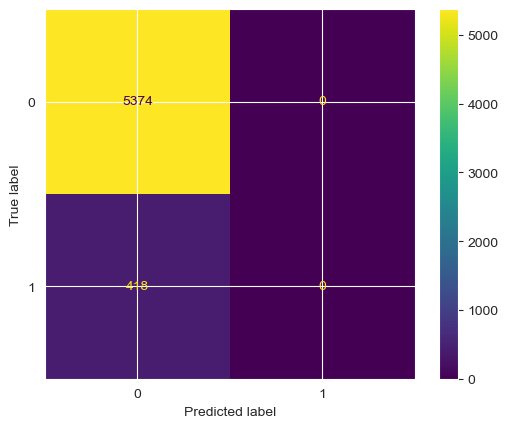

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

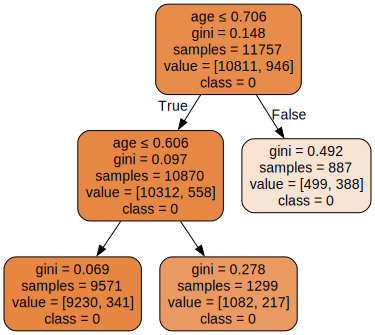

In [5]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(data.columns),
                                class_names=['0','1'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris3")
graph